In [7]:
suppressMessages(library(data.table))
suppressMessages(library(tidyverse))
suppressMessages(library(stringr))
suppressMessages(library(ggplot2))
suppressMessages(library(ggpubr))
suppressMessages(library(ggalluvial))
suppressMessages(library(ggsci))

In [2]:
setwd("/Users/inamojun/TMDU-LR_isoform_atlas/Figures")

In [3]:
#load data
load("../data/data_SupFig03.RData")

`summarise()` has grouped output by 'transcript_support_level'. You can
override using the `.groups` argument.


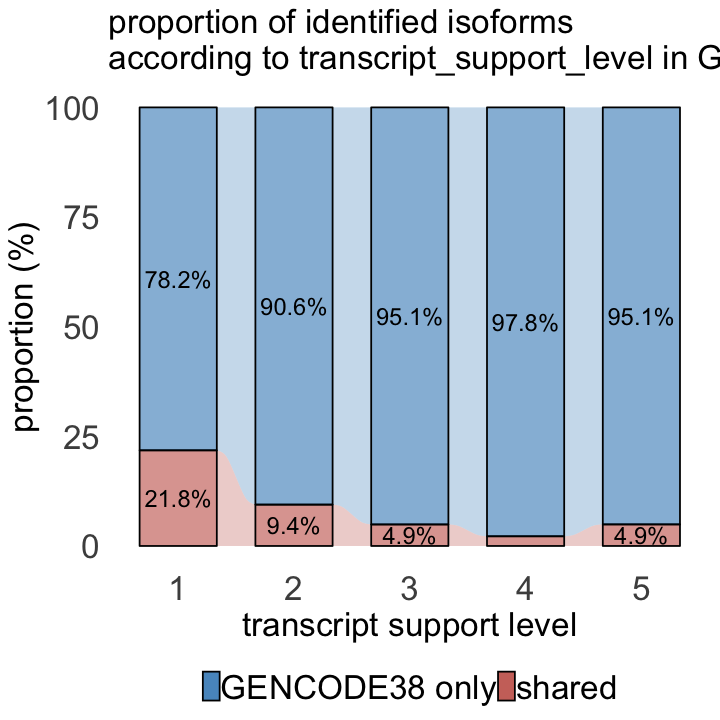

In [14]:
options(repr.plot.width=6, repr.plot.height=6)
ggplot(
  support_level %>%
    dplyr::group_by(transcript_support_level,annotation) %>%
    dplyr::summarise(count = n()) %>%
    dplyr::group_by(transcript_support_level) %>%
    dplyr::mutate(proportion = count/sum(count)*100,
                  label = ifelse(proportion > 4,  paste0(round(count/sum(count)*100,digit=1),"%"), "")) %>%
    dplyr::filter(transcript_support_level != "NA"),
  aes(x = transcript_support_level, stratum = annotation, alluvium = annotation,
      y = proportion,
      fill = annotation, label = label)) +
    geom_flow(width = 2/3) +
    geom_stratum(alpha = .5, width = 2/3) +
    geom_text(stat = "stratum", size = 5) +
    scale_fill_manual(values = c(pal_nejm("default", alpha = .5)(8)[2:1],pal_npg("nrc", alpha = 0.3)(10))) +
    ggtitle("proportion of identified isoforms\naccording to transcript_support_level in GENCODE38") +
    xlab("transcript support level") +
    ylab("proportion (%)") +
    theme_minimal() +
    theme(strip.text.x=element_text(size=20, color="black", face="bold"),
          strip.text.y=element_text(size=20, color="black", face="bold"),
          panel.grid=element_blank(),
          legend.position = "bottom",
          plot.title = element_text(size=20),
          axis.title.x = element_text(size=20),
          axis.title.y = element_text(size =20),
          axis.text.y = element_text(size = 20),
          axis.text.x = element_text(size = 20),
          legend.text =  element_text(size = 20), 
          legend.key.size = grid::unit(0.8, "lines"),
          legend.title = element_text(size = 0, hjust = 0))